<a href="https://colab.research.google.com/github/pratikshaa12/NLP/blob/main/Exploring%2Bword%2Bvectors%2Bv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

Finding Similar Words: model.wv.most_similar('word')
Word Analogies: model.wv.most_similar(positive=['word1', 'word2'], negative=['word3'])
Word Vectors: model.wv['word']
Dimensionality Reduction for Visualization: PCA or t-SNE
Plotting: Use matplotlib to plot the 2D projections of word vectors.


### Creating our sentences to train the word vectors

In [ ]:
TextCorpus = ["I like datatrained",
              "Datatrained has a good ML program",
              "Datatrained has good faculty",
              "Chidri is that good faculty",
              "I like ML"
]

In [ ]:
text_tokens = [sent.split() for sent in TextCorpus]
text_tokens[:2]

[['I', 'like', 'datatrained'],
 ['Datatrained', 'has', 'a', 'good', 'ML', 'program']]

### Training the word vectors

In [ ]:
model = Word2Vec(text_tokens,min_count=1)

In [ ]:
model.wv['ML']

array([ 9.4563962e-05,  3.0773198e-03, -6.8126451e-03, -1.3754654e-03,
        7.6685809e-03,  7.3464094e-03, -3.6732971e-03,  2.6427018e-03,
       -8.3171297e-03,  6.2054861e-03, -4.6373224e-03, -3.1641065e-03,
        9.3113566e-03,  8.7338570e-04,  7.4907029e-03, -6.0740625e-03,
        5.1605068e-03,  9.9228229e-03, -8.4573915e-03, -5.1356913e-03,
       -7.0648370e-03, -4.8626517e-03, -3.7785638e-03, -8.5361991e-03,
        7.9556061e-03, -4.8439382e-03,  8.4236134e-03,  5.2625705e-03,
       -6.5500261e-03,  3.9578713e-03,  5.4701497e-03, -7.4265362e-03,
       -7.4057197e-03, -2.4752307e-03, -8.6257253e-03, -1.5815723e-03,
       -4.0343284e-04,  3.2996845e-03,  1.4418805e-03, -8.8142155e-04,
       -5.5940580e-03,  1.7303658e-03, -8.9737179e-04,  6.7936908e-03,
        3.9735902e-03,  4.5294715e-03,  1.4343059e-03, -2.6998555e-03,
       -4.3668128e-03, -1.0320747e-03,  1.4370275e-03, -2.6460087e-03,
       -7.0737829e-03, -7.8053069e-03, -9.1217868e-03, -5.9351693e-03,
      

In [ ]:
len(model.wv['ML'])

100

In [ ]:
model.wv.most_similar("faculty", topn=5)

[('has', 0.06836597621440887),
 ('is', 0.03370187059044838),
 ('like', 0.00945278350263834),
 ('a', 0.008384964428842068),
 ('Datatrained', 0.004473232664167881)]

#### Training our word vectors on the text8 corpus

##### Importing the raw text file

Text8Corpus: This loads the text8 dataset.
Word2Vec: This is the model we use to train word embeddings.
vector_size=100: The dimensionality of the word vectors.
window=5: The maximum distance between the current and predicted words.
min_count=5: Ignores words that appear less than 5 times in the dataset.
sg=0: Specifies that you want to use CBOW (Continuous Bag of Words) rather than Skip-gram.


In [ ]:
sentences= word2vec.Text8Corpus('text8')

In [ ]:
type(sentences)

gensim.models.word2vec.Text8Corpus

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import Text8Corpus

# Path to the text8 file
corpus = Text8Corpus('/content/text8')  # Replace with the correct path if needed


In [ ]:
# Check if 'king' is in the model's vocabulary
if 'king' in model:
    print("'king' is in the vocabulary!")
else:
    print("'king' is not in the vocabulary.")

# Find similar words to 'king'
similar_words = model.most_similar('king', topn=10)
print("Most similar words to 'king':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")


'king' is in the vocabulary!
Most similar words to 'king':
kings: 0.7138045430183411
queen: 0.6510956883430481
monarch: 0.6413194537162781
crown_prince: 0.6204220056533813
prince: 0.6159993410110474
sultan: 0.5864824056625366
ruler: 0.5797567367553711
princes: 0.5646552443504333
Prince_Paras: 0.5432944297790527
throne: 0.5422105193138123


##### Using all default parameters

In [ ]:
model.most_similar("happiness")

[('contentment', 0.7695190906524658),
 ('joy', 0.6182845830917358),
 ('Happiness', 0.6116278171539307),
 ('hapiness', 0.5748556852340698),
 ('contentedness', 0.5574802756309509),
 ('happiness_quotient', 0.5532097816467285),
 ('prosocial_spending', 0.5406398773193359),
 ('happyness', 0.5387449264526367),
 ('marital_bliss', 0.5288689732551575),
 ('satisfaction', 0.5283578038215637)]

In [ ]:
# Example: king - man + woman = ?
analogy = model.most_similar(positive=['queen', 'man'], negative=['king'], topn=1)
print(f"Analogy result: {analogy[0]}")


Analogy result: ('woman', 0.7609435319900513)


In [ ]:
model.most_similar("queen")

[('queens', 0.739944338798523),
 ('princess', 0.7070532441139221),
 ('king', 0.6510956883430481),
 ('monarch', 0.6383602023124695),
 ('very_pampered_McElhatton', 0.6357026696205139),
 ('Queen', 0.6163407564163208),
 ('NYC_anglophiles_aflutter', 0.6060680150985718),
 ('Queen_Consort', 0.5923796892166138),
 ('princesses', 0.5908074975013733),
 ('royal', 0.5637185573577881)]

In [ ]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581)]

In [ ]:
model.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)

[('heroine', 0.68734210729599),
 ('heroes', 0.601749062538147),
 ('heroines', 0.5402278900146484),
 ('feminist_icon', 0.4989328682422638),
 ('idol', 0.49238699674606323)]

#### Visualizing these word vectors

In [ ]:
vectors = model.wv.key_to_index

#### We'll use PCA to reduce and visualize in 2 dimentions

In [ ]:
from sklearn.decomposition import PCA

#### randomly select 100 words

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Get all word vectors from the model (ignoring the dictionary keys)
vectors = np.array([model.wv.get_vector(word) for word in model.wv.key_to_index])

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# The result is now a 2D array with shape (n_words, 2), where each row corresponds to a word in 2D space.
print("PCA result:\n", result)


PCA result:
 [[ 0.00865436  0.02481708]
 [ 0.0162164  -0.01767665]
 [ 0.03153841  0.01346571]
 [ 0.01105889 -0.01979739]
 [ 0.01815814  0.0006639 ]
 [ 0.03190202 -0.01257688]
 [-0.00651104  0.02018115]
 [-0.01271818  0.00249   ]
 [ 0.02195229  0.00604992]
 [-0.00598486  0.01711911]
 [-0.01374665 -0.00829535]
 [ 0.01844243 -0.00511467]
 [-0.00072476 -0.00077748]
 [-0.01449476 -0.01618976]
 [-0.01473935 -0.01620282]
 [ 0.00449749 -0.00161431]
 [-0.00621591  0.02750703]
 [ 0.00124544 -0.03140703]
 [-0.00113453 -0.00110115]
 [-0.02059779  0.01016891]
 [ 0.01534603  0.00476579]
 [-0.01321999  0.00577517]
 [-0.00890518 -0.01478384]
 [-0.02903627 -0.01982765]
 [-0.00840399 -0.01828809]
 [-0.01747277 -0.00222042]
 [-0.00690288  0.0036339 ]
 [ 0.0162916   0.01104063]
 [-0.022365    0.03449694]
 [-0.00886034  0.00085825]
 [ 0.01673074  0.00284003]]


In [ ]:
import random
random.seed(2)

In [ ]:
import random

# Ensure we don't sample more than we have
sample_size = min(100, len(vectors))

# Sample random indices
ind = random.sample(range(0, len(vectors)), sample_size)

# Get the corresponding 2D results and words
result_random = result[ind]
all_words = list(model.wv.key_to_index)
words = [all_words[i] for i in ind]

print("Words sampled:", words)


Words sampled: ['home', 'became', 'royal', 'of', 'in', 'After', 'on', 'a', 'their', 'she', 'her', 'Albert', 'to', 'for', 'British', 'Queen', 'at', 'but', 'by', 'In', 'with', 'The', 'as', 'Elizabeth', 'was', 'Her', 'the', 'She', 'from', 'public', 'and']


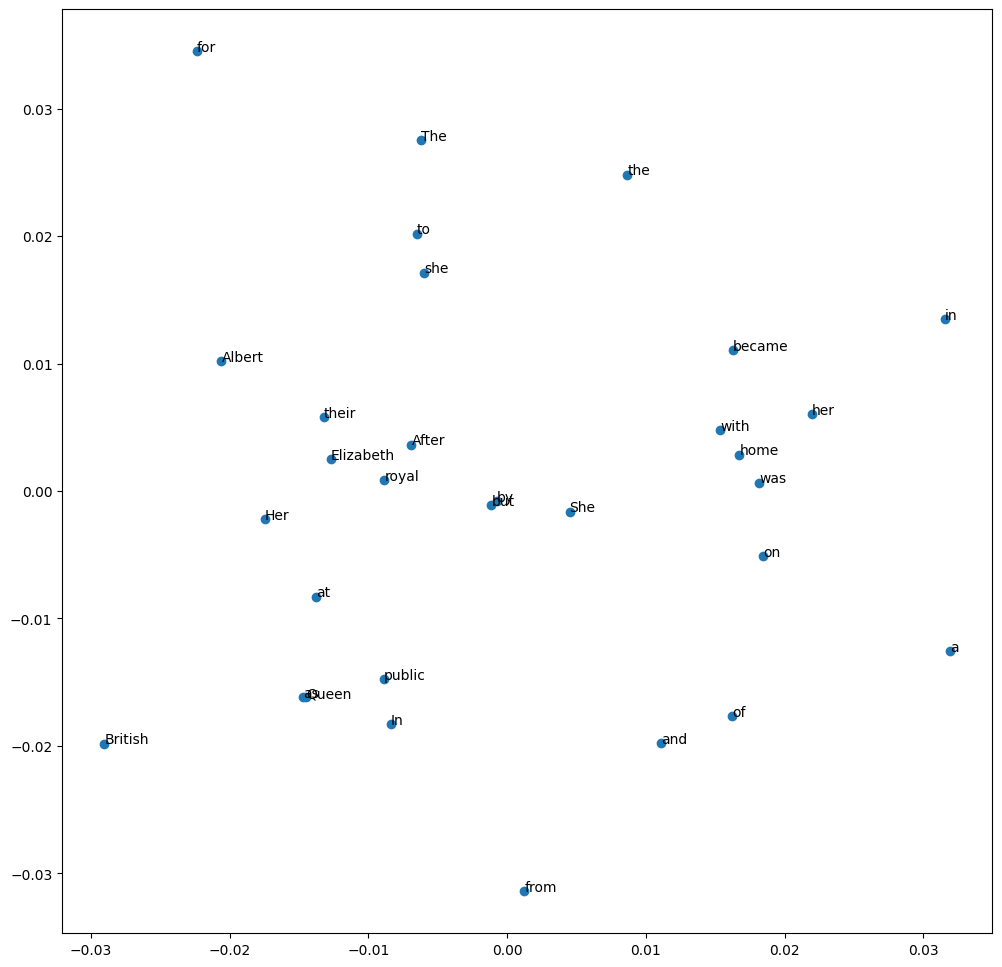

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(result_random[:,0],result_random[:,1])
for i, word in enumerate(words):
  plt.annotate(word,xy=(result_random[i,0], result_random[i,1]))
plt.show()


#### Effect of vector dimension

##### Reducing the length to 50

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import Text8Corpus

# Load the text8 corpus using Gensim's Text8Corpus (provides tokenized sentences)
corpus = Text8Corpus('/content/text8')  # Specify the correct path to the text8 file

# Initialize the Word2Vec model with desired parameters
model = Word2Vec(vector_size=50, window=5, min_count=5, sg=0)

# Build the vocabulary based on the corpus
model.build_vocab(corpus)


# Example: Get the vector for the word 'money'
vector = model.wv['money']
print("Vector for 'money':", vector)

# Example: Find words similar to 'money'
similar_words = model.wv.most_similar('money', topn=10)
print("Similar words to 'money':", similar_words)

Vector for 'money': [ 0.01101171  0.01124617 -0.01012993  0.01201778 -0.00965052  0.00463613
  0.01921067 -0.01876361 -0.0027427   0.00114866  0.00173351 -0.01079411
 -0.017669   -0.01390998 -0.01518813 -0.00631444  0.01869991 -0.01314305
  0.00291037  0.00445437 -0.00727416 -0.00855186  0.00473073 -0.00841739
  0.0068133  -0.01522664 -0.01989082  0.01478917 -0.00568355 -0.00881672
  0.01844805 -0.00892426  0.01897125  0.00862436  0.00816433  0.01747336
 -0.00693177 -0.00958174  0.01461483  0.01924561 -0.00259451  0.01252194
 -0.00346265 -0.01673998 -0.00837275 -0.00924587 -0.00774513  0.01376135
  0.01870649 -0.00596424]
Similar words to 'money': [('groote', 0.6026614308357239), ('fishy', 0.5562654733657837), ('altix', 0.5409046411514282), ('pseudotsuga', 0.5297660231590271), ('obligation', 0.5289642214775085), ('benicio', 0.5199006199836731), ('bolsover', 0.5144097805023193), ('montferrat', 0.5038042068481445), ('sza', 0.5027715563774109), ('kvac', 0.4971664249897003)]


In [ ]:
from gensim.models import Word2Vec

# Define your sentences (tokenized text)
sentences = [
    ['this', 'is', 'a', 'sentence'],
    ['another', 'example', 'sentence'],
    ['word2vec', 'is', 'powerful'],
]

# Train the Word2Vec model with a vector size of 50
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, sg=0)

# Save the model
model.save("word2vec_model.model")

# Use the model to find similar words to 'sentence'
similar_words = model.wv.most_similar('sentence', topn=1)
print(similar_words)


[('this', 0.13204392790794373)]


In [ ]:
model.wv.most_similar('money')

[('groote', 0.6026614308357239),
 ('fishy', 0.5562654733657837),
 ('altix', 0.5409046411514282),
 ('pseudotsuga', 0.5297660231590271),
 ('obligation', 0.5289642214775085),
 ('benicio', 0.5199006199836731),
 ('bolsover', 0.5144097805023193),
 ('montferrat', 0.5038042068481445),
 ('sza', 0.5027715563774109),
 ('kvac', 0.4971664249897003)]

In [ ]:
model.wv.most_similar("queen", topn=5)

[('collegiate', 0.5745934844017029),
 ('theognis', 0.5605676174163818),
 ('enacts', 0.557968258857727),
 ('atat', 0.5554683208465576),
 ('anuradhapura', 0.5450182557106018)]

In [ ]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('lortie', 0.6321567893028259),
 ('loth', 0.5583350658416748),
 ('mariam', 0.5571677684783936),
 ('scandinavia', 0.5427408814430237),
 ('inadequate', 0.5303460955619812)]

### Skipgram vs CBOW

Simply put, the CBOW model learns the embedding by predicting the current word based on its context. The skip-gram model learns by predicting the surrounding words given a current word.

#### Using Skipgram method

## Word vectors trained on different contexts
 - We'll load different corpora, from different contexts and see how the embeddings vary
 - The text8 corpus is wikipedia pages, while Brown corpus is from 15 different topics, and movie reviews are from IMDB

In [ ]:
from nltk.corpus import brown,movie_reviews

In [ ]:
import nltk
nltk.download('brown')
nltk.download('movie_reviews')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
model_brown = Word2Vec(brown.sents(), sg=1)
model_movie = Word2Vec(movie_reviews.sents(), sg=1, window=5)


In [3]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')

# Sample corpus (replace with your own text data)
corpus = ["This is a sample sentence.", "Word2Vec is great for word embeddings.", "Money makes the world go round."]

# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train a Word2Vec model (skip-gram)
model_sg = Word2Vec(tokenized_corpus, vector_size=100, window=5, sg=1, min_count=1)

# Save the model
model_sg.save("my_model_sg.model")

# Example usage
print(model_sg.wv.most_similar('money', topn=5))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('a', 0.1501632034778595), ('word', 0.12816618382930756), ('.', 0.09319855272769928), ('the', 0.09220024943351746), ('round', 0.04664919152855873)]


In [4]:
model_sg.wv.most_similar('money',topn=5)

[('a', 0.1501632034778595),
 ('word', 0.12816618382930756),
 ('.', 0.09319855272769928),
 ('the', 0.09220024943351746),
 ('round', 0.04664919152855873)]

In [ ]:
model_brown.wv.most_similar('money', topn=5)

[('care', 0.8279735445976257),
 ('job', 0.8213279843330383),
 ('anywhere', 0.8031992316246033),
 ('friendship', 0.8013567328453064),
 ('risk', 0.7990204691886902)]

In [ ]:
model_movie.wv.most_similar('money', topn=5)

[('cash', 0.7482981085777283),
 ('risk', 0.7003766894340515),
 ('pay', 0.6921611428260803),
 ('ransom', 0.6911232471466064),
 ('bucks', 0.668788492679596)]

#### Using pre-trained word vectors

### A quick note on Glove:
   - Developed by Stanford by training on 6 Billion tokens
   - Objective is slightly different
   - End result very similar to Google's word2vec

- We'll use the 100D vectors for this example.
- The trained vectors are available in a text file
- The format is slightly different from that of word2vec, necessitating the use of a utility to format accordingly

In [6]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file ="/content/glove.6B.100d.txt"
word2vec_output_file ="/content/glove.6B.100d.w2vformat.txt"
glove2word2vec(glove_input_file, word2vec_output_file )

<ipython-input-6-fe62bc4c4505>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file )


(400000, 100)

In [8]:
  from gensim.models.keyedvectors import KeyedVectors
  glove_model = KeyedVectors.load_word2vec_format("/content/glove.6B.100d.w2vformat.txt", binary=False)

#### Now u can use all the methods u used with word2vec models

In [9]:
glove_model.most_similar("king")

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [10]:
glove_model.most_similar(positive=['woman', 'king'], negative =['man'], topn=5)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991)]

In [11]:
glove_model.most_similar(positive=['woman', 'hero'], negative =['man'], topn=5)

[('heroine', 0.732498049736023),
 ('heroes', 0.6356217861175537),
 ('icon', 0.6185224056243896),
 ('beloved', 0.6136684417724609),
 ('herself', 0.5904076099395752)]